# Clustering of Learners Profiles

## Author: Sanjukta Dutta
Date: 7 Feb 2024

## Objective

● To understand the diverse backgrounds of Edu-tech learners, especially regarding their current roles, companies, and experience.
<br>● Clustering similar learners helps customize the learning experience, thereby increasing retention and satisfaction.
<br>● Analyzing the vast data of learners can uncover patterns in their professional backgrounds and preferences. This allows Scaler to make tailored content
recommendations and provide specialized mentorship.
<br>● By leveraging data science and unsupervised learning, particularly clustering techniques, Edu-tech company can group learners with similar profiles, aiding in delivering a
more personalized learning journey.

In [1]:
# Import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# MinMax standardization
from sklearn.preprocessing import MinMaxScaler
# train_test_split
from sklearn.model_selection import train_test_split
# KMeans
from sklearn.cluster import KMeans


from IPython.display import Image

import warnings
warnings.simplefilter("ignore", UserWarning)

In [2]:
# Read the dataset
df = pd.read_csv('data/df.csv')
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [3]:
# Drop the unnamed:0 column
df.drop(columns='Unnamed: 0', inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153279 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


In [5]:
# Shape of Dataset
df.shape

(205843, 6)

In [6]:
# Change the float type of the orgyear and ctc_update_year to int64 for easy calculation
df['orgyear'] = df['orgyear'].astype('Int64')
df['ctc_updated_year'] = df['ctc_updated_year'].astype('Int64')

In [7]:
# Change job position to category
df['job_position'] = df['job_position'].astype('category')

In [8]:
# Drop the duplicate rows
df.drop_duplicates(inplace=True, ignore_index=True)

In [9]:
# Shape of new dataframe
df.shape

(205809, 6)

## Step: Imputation of missing values

In [10]:
# Count of missing values column-wise
df.isnull().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52548
ctc_updated_year        0
dtype: int64

In [11]:
# Percentage of missing values column-wise
df.isnull().sum()/df.shape[0]*100

company_hash         0.021379
email_hash           0.000000
orgyear              0.041786
ctc                  0.000000
job_position        25.532411
ctc_updated_year     0.000000
dtype: float64

In [12]:
# Check and maintain the data for individuals with single or more than one job over the time
email_hash_df = df.email_hash.value_counts().reset_index()

In [13]:
# The value count of the individuals with their number of companies over time
email_hash_df['count'].value_counts()

count
1     112252
2      32537
3       6740
4       1466
5        329
6         94
7         15
8          6
9          3
10         1
Name: count, dtype: int64

* There is one individual 10 records of working within the same company but with different job positions and ctc
* 3 individuals with 9 work experience records
* 6 individuals with 8 work experience records
* 15 individuals with 7 work experience records
* 94 individuals with 6 work experience records

In [14]:
(email_hash_df['count'].value_counts()/email_hash_df.shape[0]*100).round(2)

count
1     73.16
2     21.20
3      4.39
4      0.96
5      0.21
6      0.06
7      0.01
8      0.00
9      0.00
10     0.00
Name: count, dtype: float64

* 73.16% of learners have a single record of work experience
* 21.20% of learners have two records of work experience
* 4.39% of learners have three records of work experience

* Max learner pool has work experience working in a single company

In [15]:
# email_hash_df[email_hash_df['count']==10]['email_hash'].values

In [16]:
# Details of individual who has 10 records of work experience 
df[df.email_hash.isin(email_hash_df[email_hash_df['count']==10].email_hash.values)]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
24109,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018,720000,NaN,2020
45984,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018,720000,Support Engineer,2020
72315,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018,720000,Other,2020
102912,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018,720000,FullStack Engineer,2020
117754,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018,720000,Data Analyst,2020
121472,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018,660000,Other,2019
124463,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018,660000,Support Engineer,2019
144462,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018,660000,FullStack Engineer,2019
152782,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018,660000,Devops Engineer,2019
159815,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018,660000,NaN,2019


It is evident that there are multiple entry for different job roles for this learner. In the span of intial 1st year (2018-2019) he had 5 job_position and in the next 1 year he had 5 positions (2019-2020). May be this individual worked in a start-up where the job role wasn't defined and kept changing

    There are multiple records present in the dataset for each individual which reflects their job switch and change in ctc over the years. Hence, we need aggregation of the multi-records

_________________________________________________________________________________________________________
Job position has the highest number of missing values.

Checking if aggregating helps remove the job_position missing values.
* aggregating on email_hash to eliminate duplicate entry (candidates who worked in more than one companies over different years)
* orgyear should be the start date of joining any organisation (In our dataset, the above rows reflect the latest employment whereas last entry denotes the first company details)
* job_position should be the non-NAN value and the first (i.e. the latest position held at job)
* ctc should be the first (latest CTC)
* company should be the one with the ctc_updated_year company (first entry out of multiple)

In [17]:
# Aggregating the individuals based on their latest employment details
function_dict = {'job_position':'first', 'ctc_updated_year':'first',
                 'company_hash':'first', 'orgyear':'last', 
                 'ctc':'first'
                }
new_df=df.groupby(['email_hash']).aggregate(function_dict).reset_index()

In [18]:
# Count of missing values from new Data
new_df.isnull().sum()

email_hash              0
job_position        20225
ctc_updated_year        0
company_hash           32
orgyear                78
ctc                     0
dtype: int64

In [19]:
# Percentage of missing values
new_df.isnull().sum()/new_df.shape[0]*100

email_hash           0.000000
job_position        13.180790
ctc_updated_year     0.000000
company_hash         0.020855
orgyear              0.050833
ctc                  0.000000
dtype: float64

In [20]:
new_df.shape

(153443, 6)

In [21]:
# Replacing the NAN job_positions with 'Other'
new_df.job_position.fillna('Other', inplace=True)

In [22]:
# Change the job_position in lower case all together to group similar jobs
new_df['job_position'] = new_df['job_position'].apply(lambda x: x.lower())

In [23]:
len(new_df.job_position.unique())

770

In [24]:
# The pattern map for generalizing the Job Positions
pattern_map = [(r'\b(backend|back\s?end|back-end)\b','Backend Engineer'), (r'\b(frontend|front\s?end|front-end)\b','FrontEnd Engineer'), (r'\b(fullstack|full\s?stack|full-stack)\b','FullStack Engineer'),
            (r'\bsr\b|\bsenior\b','Senior Software Engineer'),
            (r'\b(\bsde\w*|software\s?development\s?engineer|sdet|software\s?development|pune|bengaluru|\w*developer\w*|\w*devloper\w*|\w*android\w*|\w*develloper\w*)\b','Software Development Engineer'),
            (r'\b(engineer|software\w*|l4|se4|pop|sre)\b','Software Engineer'), (r'\b(intern|\w*trainee\w*|\w*apprentice\w*)\b','Intern'),
            (r'\b(data\s?scientist|machine\s?learn\w*)\b','Data Scientist'), (r'\b(\blead\w*)\b','Leadership Roles'), (r'\b(\w*research\w*|r\&d\w*|\w*scientist\w*|\w*rnd\w*|\w*reseach\w*)\b','R&D'),
            (r'\b(\w*manager\w*|hod)\b','Manager'), (r'\b(\w*consult\w*|\w*advisor\w*)\b','Consultant'), (r'\b(\w*student\w*|ucm|pgt\w*|\w*graduate\w*)\b','Student'),
            (r'\b(\w*founder\w*|entrepren\w*|self\s?emp\w*|self\s?\w*|business\s?man)\b','Co-founder'), 
            (r'\b(\bteach\w*|\w*professor\w*|lecturer|computer\s?faculty|\w*train\w*|\w*sme\w*|\w*expert\w*|\w*instruct\w*|ta|tsc|compliance\w*)\b','Professor'),
            (r'\b(\w*design\w*|\w*architect\w*)\b', 'Designer'), (r'\b(\w*cloud\w*)\b', 'Cloud'), 
            (r'\b(\w*techn\w*|\w*mts\w*|q|network\w*|x|team\w*|tech\w*|\w*tester\w*|Cloud)\b','Technical'),
            (r'\b(data analyst|ba)\b','Data Analyst'), (r'\b(\w*analy\w*)\b','Analyst'), (r'\b(\w*engine\w*|\w*eingineer\w*|\w*enginner\w*)\b','Engineer'),
            (r'\b(\w*market\w*|\w*retail\w*|\w*stor\w*|\w*sale\w*|maricketing|ase|so|\w*sell\w*|seleceman)\b','Marketing'),
            (r'\b(\w*executive\w*|\w*president\w*|\w*director\w*|\w*coo\w*|\w*executive\w*|cto|owner|pmo|chief\s?people\s?officer)\b', 'Executive'),
            (r'\b(\w*account\w*|\w*loan\w*|\w*cash\w*|\w*teller\w*|\w*finance\w*|\w*audit\w*|\w*credit\w*|\w*insurance\w*|forex|telar|\w*risk\w*|\w*atm\w*|\w*bank\w*|bta|eno|\w*officer\w*)\b','Finance'),
            (r'\b(\w*database\s?administrator\w*|oracle\s?dba)\b', 'Database Administrator'),  
            (r'\b(\w*non\s?coder\w*|worker|\w*driver\w*|\w*clerk\w*|farmer|crc|\w*support\w*|zomato|toyota|human\s?resource|air\s?force|sub-inspector|medical\s?field|f&b service|talent\s?acquisition\s?specialist)\b', 'Non Coder'),
            (r'\b(\w*other\w*)\b', 'Other'),
            (r'\b(\w*associate\w*|\w*special\w*|\w*admin\w*|\w*program\w*|\w*project\w*|\w*safety\w*|\w*integrat\w*|\w*auto\w*|\w*strategy\w*)\b','Associate'),
            (r'\b(\b\d+(\.\d+)?\b|no\w*|\w*not\w*|\w*unemp\w*|na|null|\w*fresher\w*|jharkhand|\w*can\'t\w*|^\.\w*)\b', 'Not Working'),
           ]

In [25]:
def rename_job_position(pattern_data, new_df):
    pattern = pattern_data[0]
    mask = new_df['job_position'].str.contains(pattern, case=True, regex=True)
    new_df.loc[mask, 'job_position'] = pattern_data[1]
    return new_df

In [26]:
# replacing the job_positions with generic names
for data in pattern_map:
    new_df = rename_job_position(data, new_df)

In [27]:
new_df.job_position.value_counts()

job_position
Backend Engineer                                                   38412
Other                                                              35983
FullStack Engineer                                                 21421
Software Engineer                                                  16668
Software Development Engineer                                       9595
FrontEnd Engineer                                                   9285
Leadership Roles                                                    6359
Data Scientist                                                      4902
Data Analyst                                                        2550
Intern                                                              2121
Manager                                                             1876
Designer                                                            1288
R&D                                                                  996
Non Coder                             

In [28]:
# Clubbing all the remaining jobs in Non Coder
# getting the index of all the job_positions with count == 1
cnt_1_idx = new_df.job_position.value_counts().sort_values(ascending=False).reset_index()
cnt_1_jp = cnt_1_idx[cnt_1_idx['count']==1].job_position.values
# cnt_1_idx = new_df[new_df.job_position.isin(cnt_1_jp)].index
# Replace the remaining jobs with Non Coder
new_df.replace(cnt_1_jp,'Non Coder', inplace=True)

In [29]:
new_df.head()

,email_hash,job_position,ctc_updated_year,company_hash,orgyear,ctc
0,00003288036a44374976948c327f246fdbdf0778546904...,Backend Engineer,2019,bxwqgogen,2012,3500000
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,Backend Engineer,2020,nqsn axsxnvr,2013,250000
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,FullStack Engineer,2019,gunhb,2021,1300000
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,FullStack Engineer,2021,bxwqgotbx wgqugqvnxgz,2004,2000000
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,Other,2018,fvrbvqn rvmo,2009,3400000


In [30]:
new_df.job_position.value_counts().sort_values(ascending=False).reset_index().head(20)

,job_position,count
0,Backend Engineer,38412
1,Other,35983
2,FullStack Engineer,21421
3,Software Engineer,16668
4,Software Development Engineer,9595
5,FrontEnd Engineer,9285
6,Leadership Roles,6359
7,Data Scientist,4902
8,Data Analyst,2550
9,Intern,2121


In [31]:
new_df.job_position.value_counts().sort_values(ascending=False).reset_index().tail(20)

,job_position,count
8,Data Analyst,2550
9,Intern,2121
10,Manager,1876
11,Designer,1288
12,R&D,996
13,Non Coder,576
14,Database Administrator,515
15,Co-founder,335
16,Senior Software Engineer,196
17,Technical,74


In [32]:
len(new_df['job_position'].unique())

28

In [33]:
for i in new_df.job_position.unique():
    print(i)

Backend Engineer
FullStack Engineer
Other
Database Administrator
FrontEnd Engineer
Software Development Engineer
Designer
Software Engineer
Leadership Roles
Data Scientist
Data Analyst
Intern
R&D
Manager
Co-founder
Consultant
Non Coder
Senior Software Engineer
Marketing
Technical
Not Working
Associate
Analyst
Executive
Finance
Student
Professor
Engineer


In [34]:
new_df.isnull().sum()/new_df.shape[0]*100

email_hash          0.000000
job_position        0.000000
ctc_updated_year    0.000000
company_hash        0.020855
orgyear             0.050833
ctc                 0.000000
dtype: float64

    Since orgyear is missing from 0.05% of the data and company_hash has 0.02% missing values, we will remove those data

In [35]:
# Removing the data for missing orgyear and company_hash
new_df.dropna(subset=['orgyear','company_hash'], inplace=True, ignore_index=True)

In [36]:
new_df.shape

(153333, 6)

In [37]:
# Changing the type of email_hash, company_hash and job_position to category
new_df.email_hash = new_df.email_hash.astype('category')
new_df.company_hash = new_df.company_hash.astype('category')
new_df.job_position = new_df.job_position.astype('category')

### Year of Experience Feature

    Create a new Feature: Years of Experience: ctc_updated_year - orgyear

In [38]:
new_df['Years of Experience'] = new_df['ctc_updated_year']-new_df['orgyear']

In [39]:
new_df['Years of Experience'].value_counts().sort_index(ascending=False)

Years of Experience
2021      6
2020      3
2019      5
2018      2
2017      3
         ..
-11       2
-80       1
-85       1
-186      1
-18146    2
Name: count, Length: 77, dtype: Int64

    Year of Experience is in negative, and more than 2000. These are the tentative outliers. Checking few of these records

In [40]:
# Year of Experience is greater than 55
new_df[(new_df['Years of Experience']>55)]

,email_hash,job_position,ctc_updated_year,company_hash,orgyear,ctc,Years of Experience
3988,069308440811d578c817c05392f97e8919baac6aa12aa3...,Data Scientist,2019,vaxnjv mxqrv wvuxnvr,1,2900000,2018
6398,0a5e691a0f8c2c06862ef19d43dc11c22f462f800db26b...,Other,2019,vxqvoxv,0,800000,2019
15434,1978da71c14333352d051bfb6054904770b70cecce389d...,Software Engineer,2021,vzshrvq atcqrgutq,91,400000,1930
15593,19bd55263d4e8cb5659b50814dc18b1fbdd1b7e0689e4b...,Backend Engineer,2019,wxowg,5,1000000,2014
30367,32a3ee8218df48d1ba56e0e87323a5225c83929d00a6d8...,Software Engineer,2019,adw ntwyzgrgsj,3,1250000,2016
30560,32fb75b1f5c1001ab5e34280641e13d5b91f8cdaa65772...,FrontEnd Engineer,2019,vowtzv,2,1470000,2017
32634,3661bbc848e743c2ad62c20fc8a6e0eedebc33e2288b1f...,Software Engineer,2019,tr xzeg atoxsz,3,690000,2016
33401,37a5cce01b1e049307d73bbb2138fa54cbb02555c2137a...,Other,2021,awm mvzp,0,700000,2021
36715,3d3a669652938eaf0f9f3c862db3c805a9f55c3961b0c6...,Other,2020,nqvctrgpv,0,2500000,2020
36955,3da3c964efe7a5db0f63e91be25391dcaadf24d44cdc59...,Leadership Roles,2019,ovst xznvwwn ogenfvqt ucn rna,1900,3170000,119


In [41]:
# Year of Experience is negative
new_df[(new_df['Years of Experience']<0)]

,email_hash,job_position,ctc_updated_year,company_hash,orgyear,ctc,Years of Experience
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,FullStack Engineer,2019,gunhb,2021,1300000,-2
26,000dbb08ff8c14f7c6d4729e0d9015c48cc57c6de27cf2...,Other,2015,bxwqgogen qa xzaxv uqxcvnt rna,2016,1650000,-1
45,0011de50390ba4a97b397299563fcaddc566721bb6b76a...,Other,2020,onvqnhu,2021,600000,-1
46,0011e65b6e10124592d9ecfae362d16ae8587309947d12...,Backend Engineer,2016,bgmonvw,2018,1100000,-2
51,00149de9bcbf2423568b9c6b6fabdf6c97a5ca346d6674...,Backend Engineer,2017,nyt a t oyvf sqghu,2018,2100000,-1
...,...,...,...,...,...,...,...
153216,ffc7b3c4381194b6c405cd469f0862be6d209518d50228...,Other,2017,eqtoytq,2018,300000,-1
153231,ffcf5925a8dc00fe70d297b563a0e55623c06b97552c0d...,Backend Engineer,2020,vouxqt ojontbo,2021,540000,-1
153266,ffdff697bf764afd630b47586f36c67bc8bed7a14b20a5...,FullStack Engineer,2015,fgqptd,2016,1000000,-1
153274,ffe39c3314bdfdcd49d0bcdcd6b5e056b2233266eb36ac...,FullStack Engineer,2021,sqvahvnt onhatzn,2023,1200000,-2


### Numerical Columns Description

In [42]:
new_df.select_dtypes(np.number).describe()

,ctc_updated_year,orgyear,ctc,Years of Experience
count,153333.0,153333.0,1.533330e+05,153333.0
mean,2019.470708,2014.564771,2.517322e+06,4.905937
std,1.367138,72.732696,1.311403e+07,72.728162
min,2015.0,0.0,2.000000e+00,-18146.0
25%,2019.0,2013.0,5.500000e+05,2.0
50%,2020.0,2016.0,9.699990e+05,4.0
75%,2021.0,2018.0,1.700000e+06,6.0
max,2021.0,20165.0,1.000150e+09,2021.0


    * orgyear has outliers/wrong information provided, minimum is 0 and maximum is 20165, which clearly are mis-information
    * CTC has few outliers as minimum CTC is Rs. 2
    * Years of Experience has outliers as min is a negative number and maximum is 2021 (not possible)

## Univariate Analysis

In [43]:
# new_df.select_dtypes(np.number).columns

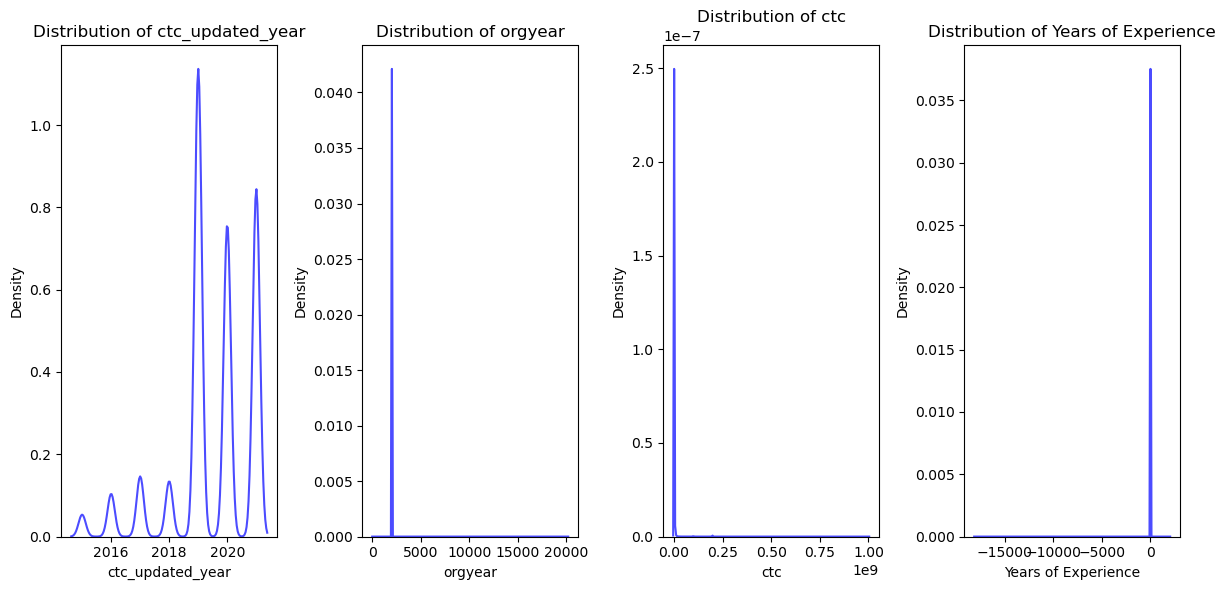

In [44]:
# Numerical Features Plot:
plt.figure(figsize=(12, 6))

# Plot using Matplotlib's histogram
for i, column in enumerate(new_df.select_dtypes(np.number).columns):
    plt.subplot(1, 4, i+1)
    sns.kdeplot(new_df[column], color='blue', alpha=0.7)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


    - CTC update was made maximum on 2019, followed by 2021 and 2020
    - Max learners joined the organization in year [2010, 2021] 
    - Majority of learners ctc ranges around Rs. [300000, 1700000] 
    - Max year of experience lies in [0,6]

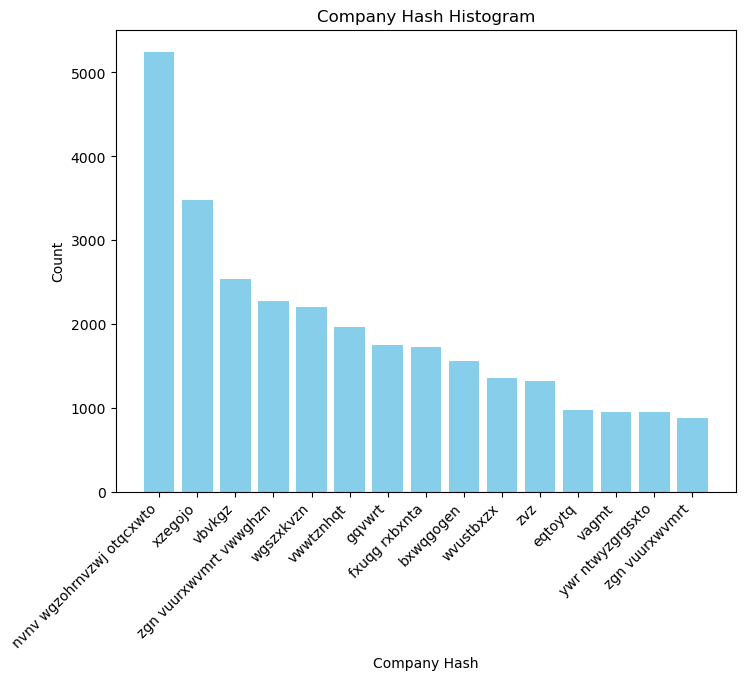

In [45]:
# Plotting for the top 15 Company Hash
plt.figure(figsize=(8, 6))
plt.bar(new_df['company_hash'].value_counts().sort_values(ascending=False).reset_index().head(15)['company_hash'], 
        new_df['company_hash'].value_counts().sort_values(ascending=False).reset_index().head(15)['count'], 
        color='skyblue')
plt.xlabel('Company Hash')
plt.ylabel('Count')
plt.title('Company Hash Histogram')
plt.xticks(rotation=45, ha='right')  # Tilt x-ticks 45 degrees
plt.show()

In [46]:
new_df['company_hash'].value_counts().sort_values(ascending=False).reset_index().head(10)

,company_hash,count
0,nvnv wgzohrnvzwj otqcxwto,5249
1,xzegojo,3475
2,vbvkgz,2541
3,zgn vuurxwvmrt vwwghzn,2276
4,wgszxkvzn,2201
5,vwwtznhqt,1960
6,gqvwrt,1743
7,fxuqg rxbxnta,1728
8,bxwqgogen,1559
9,wvustbxzx,1359


    Highest number of learners are employed in "nvnv wgzohrnvzwj otqcxwt" Company

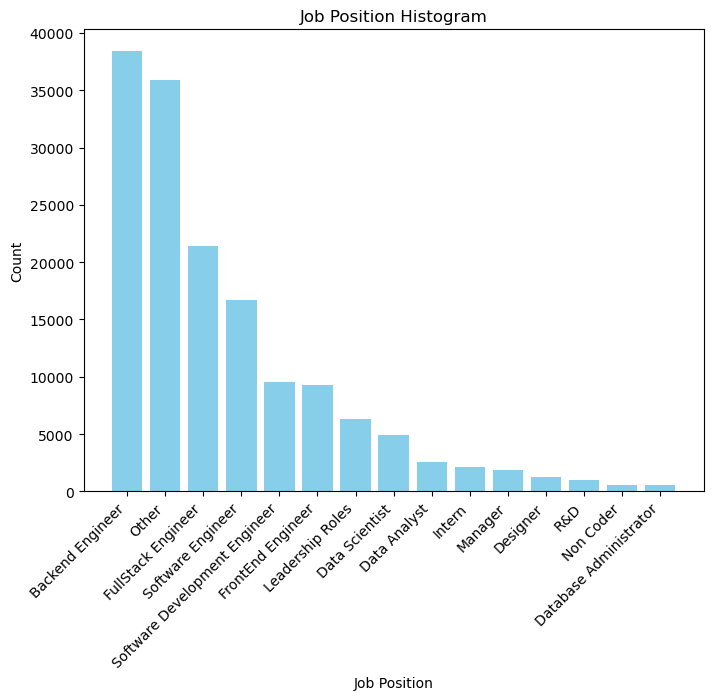

In [47]:
# Plotting for the top 15 job Position
plt.figure(figsize=(8, 6))
plt.bar(new_df['job_position'].value_counts().sort_values(ascending=False).reset_index().head(15)['job_position'], 
        new_df['job_position'].value_counts().sort_values(ascending=False).reset_index().head(15)['count'], 
        color='skyblue')
plt.xlabel('Job Position')
plt.ylabel('Count')
plt.title('Job Position Histogram')
plt.xticks(rotation=45, ha='right')  # Tilt x-ticks 45 degrees
plt.show()

    Maximum learners have a job position of Backend Engineer

## Bivariate Analysis

In [48]:
new_df_num = new_df.select_dtypes(np.number)

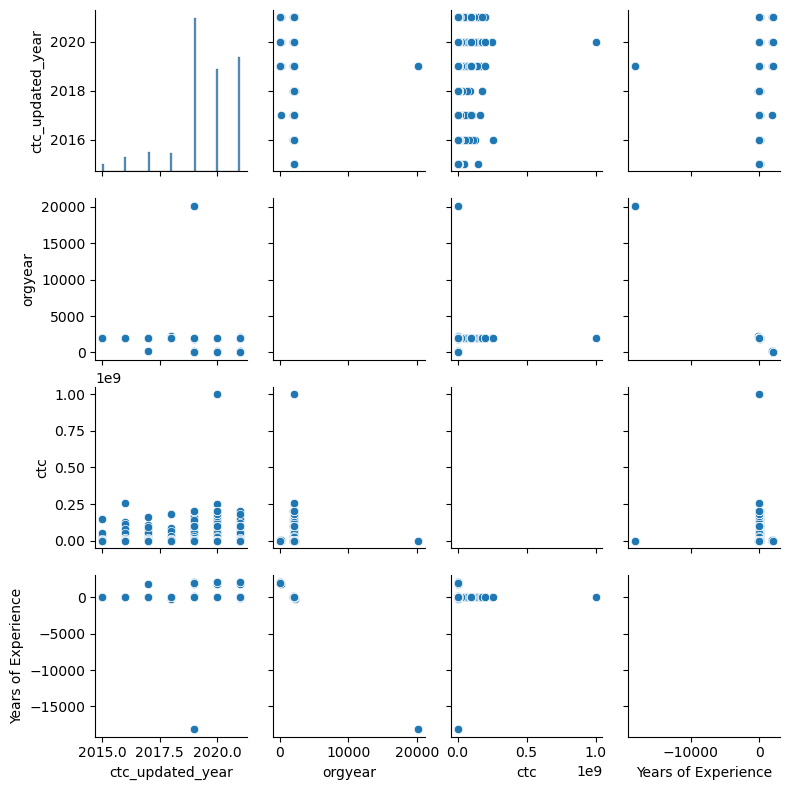

<Figure size 800x800 with 0 Axes>

In [49]:
# Plot numerical values pairplot
# sns.pairplot(new_df_num)
# plt.show()

sns_plot = sns.pairplot(new_df_num, size=2.0)
sns_plot.savefig("pairplot.png")

plt.clf() # Clean parirplot figure from sns 
Image(filename='pairplot.png') # Show pairplot as image

    * There are outliers present in orgyear, ctc and Years of Experience

### Outliers Treatment

#### orgyear

In [50]:
# orgyear
new_df.orgyear.value_counts().sort_index(ascending=False).reset_index().tail(20)

,orgyear,count
56,1973,1
57,1972,1
58,1971,1
59,1970,2
60,1900,1
61,209,1
62,208,1
63,206,1
64,201,1
65,200,1


    Organization year cannot be more than 2024 and less than 1990, believeing we have records from 1990 to 2024. Hence removing the records where orgyear>2024 or orgyear<1990

In [51]:
# Dropping the records where orgyear>2024 or orgyear<1990
remove_idx = new_df[(new_df['orgyear']>2024)|(new_df['orgyear']<1990)].index
new_df.drop(remove_idx, inplace=True)

# Resetting the index of the dataframe
new_df.reset_index(inplace=True, drop=True)

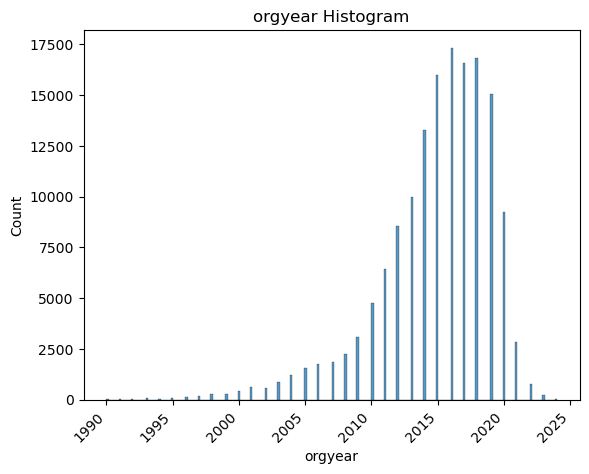

In [52]:
# Plotting the orgyear
sns.histplot(x=new_df['orgyear'])
plt.title('orgyear Histogram')
plt.xticks(rotation=45, ha='right')  # Tilt x-ticks 45 degrees
plt.show()

    Even after capping the orgyear, deistribution is left skewed. Hence, only cosidering org years from 2000 onwards

In [53]:
# Dropping the records whereorgyear<2000
remove_idx = new_df[new_df['orgyear']<2000].index
new_df.drop(remove_idx, inplace=True)

# Resetting the index of the dataframe
new_df.reset_index(inplace=True, drop=True)

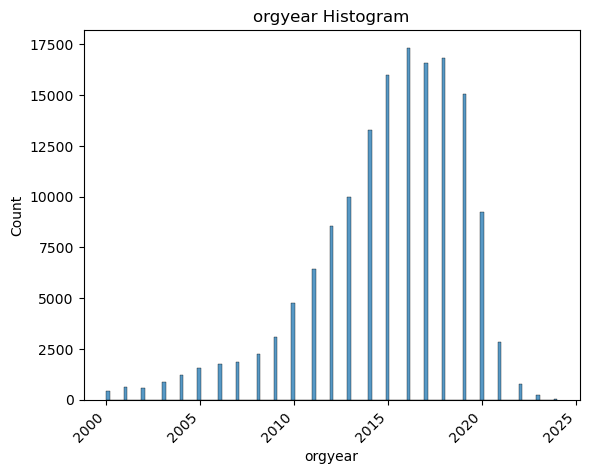

In [54]:
# Plotting the orgyear
sns.histplot(x=new_df['orgyear'])
plt.title('orgyear Histogram')
plt.xticks(rotation=45, ha='right')  # Tilt x-ticks 45 degrees
plt.show()

#### ctc

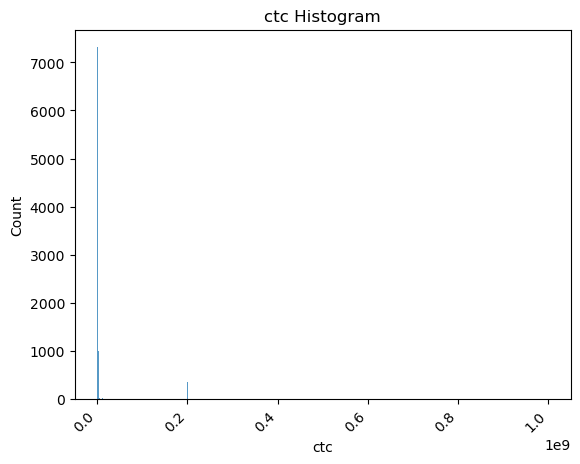

In [55]:
sns.histplot(x=new_df['ctc'])
plt.title('ctc Histogram')
plt.xticks(rotation=45, ha='right')  # Tilt x-ticks 45 degrees
plt.show()

In [56]:
new_df.ctc.value_counts().sort_index(ascending=False).reset_index().iloc[300:320]

,ctc,count
300,28000000,3
301,27800000,1
302,27700000,1
303,27600000,1
304,27500000,3
305,27400000,1
306,27000000,1
307,26800000,1
308,26700000,1
309,26500000,1


# There is huge variation in the ctc of learners. 
    Capping the ctc in the range of [100000, 20000000]
    Removing the others
    Considering the general population

In [57]:
# Dropping the records where ctc>20000000 and ctc<100000
remove_idx = new_df[(new_df['ctc']>20000000)|(new_df['ctc']<100000)].index
new_df.drop(remove_idx, inplace=True)

# Resetting the index of the dataframe
new_df.reset_index(inplace=True, drop=True)

In [58]:
new_df.ctc.value_counts().sort_index(ascending=False).reset_index()

,ctc,count
0,20000000,42
1,19998000,1
2,19959000,1
3,19800000,6
4,19700000,1
...,...,...
2497,102000,22
2498,101500,1
2499,101000,13
2500,100800,1


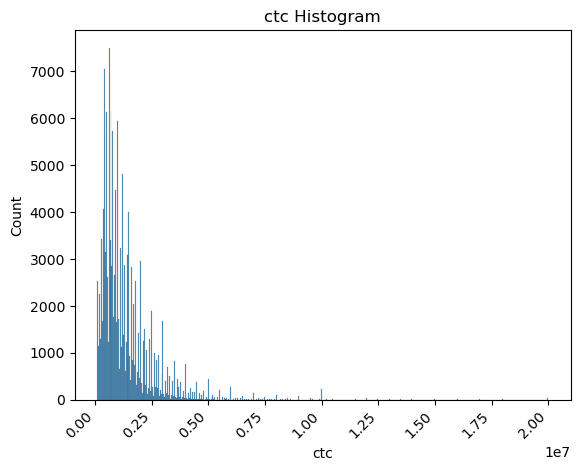

In [59]:
sns.histplot(x=new_df['ctc'])
plt.title('ctc Histogram')
plt.xticks(rotation=45, ha='right')  # Tilt x-ticks 45 degrees
plt.show()

    - The CTC is highly right skewed, Few very High Earning Individuals are present amongst the learners

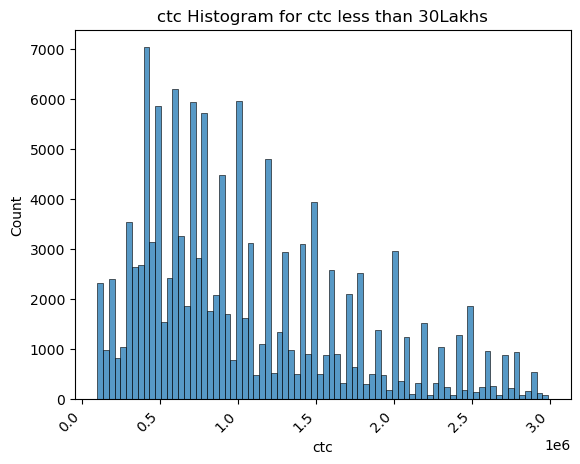

In [60]:
# Plot for ctc upto 30lakhs
sns.histplot(x=new_df[new_df['ctc']<3000000].ctc)
plt.title('ctc Histogram for ctc less than 30Lakhs')
plt.xticks(rotation=45, ha='right')  # Tilt x-ticks 45 degrees
plt.show()

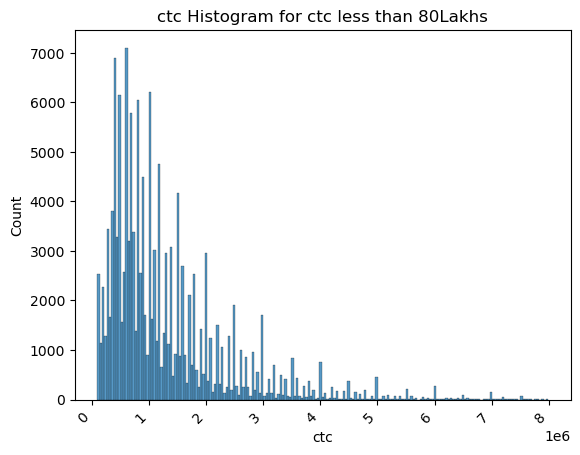

In [61]:
sns.histplot(x=new_df[new_df['ctc']<8000000].ctc)
# sns.histplot(x=new_df['ctc'])
plt.title('ctc Histogram for ctc less than 80Lakhs')
plt.xticks(rotation=45, ha='right')  # Tilt x-ticks 45 degrees
plt.show()

    As the CTC goes beyond 30lakhs, the distribution becomes right skewed. Hence,  we will bin our data into 4 categories. ['Low', 'Medium', 'High', 'Very High']
    The range for:
    Low [100000,600000)
    Medium [600000,1400000)
    High [140000,2500000)
    Very High [2500000, 20000000]

In [62]:
# Binning the CTC based on the above range
# Define the bin edges and labels
bin_edges = [99999, 600000, 1400000, 2500000, 20000000]
bin_labels = ['Low', 'Medium', 'High', 'Very High']

# Use pd.cut to convert continuous variable into categories
new_df['CTC_Label'] = pd.cut(new_df['ctc'], bins=bin_edges, labels=bin_labels)

In [63]:
new_df.CTC_Label.value_counts()

CTC_Label
Medium       56910
Low          42247
High         30133
Very High    17434
Name: count, dtype: int64

#### Years of Experience

In [64]:
new_df['Years of Experience'].value_counts()

Years of Experience
2     18643
3     18525
4     17124
1     14754
5     14360
6     11328
0      9690
7      8881
8      6569
-1     4981
9      4977
10     3554
11     2576
12     1997
13     1660
14     1448
-2     1319
15     1201
16      921
17      659
18      492
19      447
-3      311
20      184
-4       49
21       48
-5       23
-6        2
-8        1
Name: count, dtype: Int64

In [65]:
# Removing the negative years of experience and Years of Experience >20
remove_idx = new_df[(new_df['Years of Experience']<0)|(new_df['Years of Experience']>20)].index
new_df.drop(remove_idx, inplace=True)

# Resetting the index of the dataframe
new_df.reset_index(inplace=True, drop=True)

In [66]:
new_df.shape

(139990, 8)

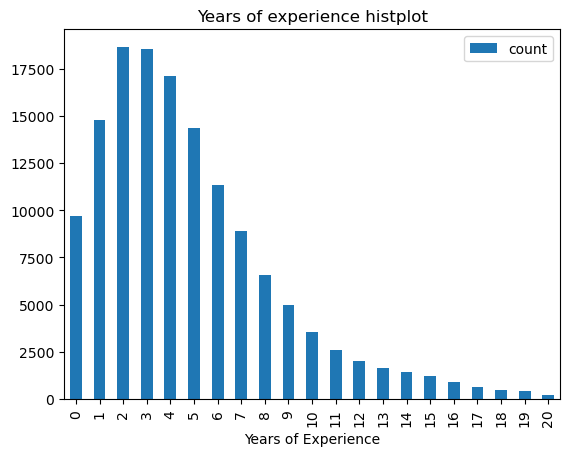

In [67]:
new_df['Years of Experience'].value_counts().sort_index().reset_index().plot.bar(x='Years of Experience', y='count')
plt.title("Years of experience histplot")
plt.show()

    - Distribution is right skewed, possibility of outliers

### Flag for promotion

In [68]:
#cta  at the beginning
ctc_first = df.groupby('email_hash').agg({'ctc':'last'})

#Quarterly rating at the end
ctc_last = df.groupby('email_hash').agg({'ctc':'first'})

#The dataset which has the learners email (identification) and a bollean value which tells if the ctc has increased
CTC = (ctc_last['ctc']>ctc_first['ctc']).reset_index()

#the learners emails whose ctc has increased
learner_id = CTC[CTC['ctc']==True]['email_hash']

ctc_inc = []
for i in new_df['email_hash']:
    if i in learner_id.values:  # changed -- instead of empid--> empid.values
        ctc_inc.append(1)
    else:
        ctc_inc.append(0)

new_df['CTC_Increased'] = ctc_inc

In [69]:
new_df.tail()

,email_hash,job_position,ctc_updated_year,company_hash,orgyear,ctc,Years of Experience,CTC_Label,CTC_Increased
139985,fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...,Software Engineer,2019,tqxwoogz ogenfvqt wvbuho,2004,3529999,15,Very High,0
139986,fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...,Other,2018,trnqvcg,2015,1600000,3,High,0
139987,fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...,Software Engineer,2019,znn avnv srgmvr atrxctqj otqcxwto,2014,900000,5,Medium,0
139988,ffff49f963e4493d8bbc7cc15365423d84a767259f7200...,FullStack Engineer,2020,zwq wgqugqvnxgz,2020,700000,0,Medium,0
139989,ffffa3eb3575f43b86d986911463dce7bcadcea227e5a4...,FullStack Engineer,2021,sgrabvz ovwyo,2018,1500000,3,High,0


In [70]:
new_df.job_position.value_counts().sort_values(ascending=False)

job_position
Backend Engineer                 36021
Other                            30850
FullStack Engineer               19748
Software Engineer                15893
Software Development Engineer     9237
FrontEnd Engineer                 8741
Leadership Roles                  5569
Data Scientist                    4543
Data Analyst                      2328
Manager                           1641
Intern                            1533
Designer                          1210
R&D                                862
Non Coder                          551
Database Administrator             457
Co-founder                         294
Senior Software Engineer           189
Technical                           65
Analyst                             42
Associate                           41
Consultant                          38
Professor                           33
Not Working                         21
Executive                           20
Finance                             19
Student     

In [71]:
len(new_df.job_position.value_counts())

28

#### Extra aggregation features

    Categorizing the companies as Tier 1, Tier 2, Tier 3 and Tier 4 based on average salary

In [72]:
new_df.groupby('company_hash', observed=True).agg({'ctc':['mean', 'count']}).sort_values([('ctc', 'count')], ascending=False).reset_index()

company_hash           ctc      
                                             mean count
0         nvnv wgzohrnvzwj otqcxwto  6.196986e+05  4866
1                           xzegojo  6.580655e+05  3233
2                            vbvkgz  2.342442e+06  2308
3                         wgszxkvzn  7.649897e+05  2067
4            zgn vuurxwvmrt vwwghzn  8.960016e+05  2047
...                             ...           ...   ...
33024                 nyt vuuxzttqo  3.000000e+05     1
33025     nyt vtqgouvwt wgqugqvnxgz  1.000000e+07     1
33026  nyt vpoyvjv uvnqv eghzavnxgz  5.000000e+05     1
33027               nyt vop ztnfgqp  3.000000e+05     1
33028                        zzzbzb  7.200000e+05     1

[33029 rows x 3 columns]

In [73]:
# Get the mean salary range of the companies
company_mean_salary = new_df.groupby('company_hash', observed=True).agg({'ctc':['mean', 'count']}).reset_index()[('ctc','mean')].values

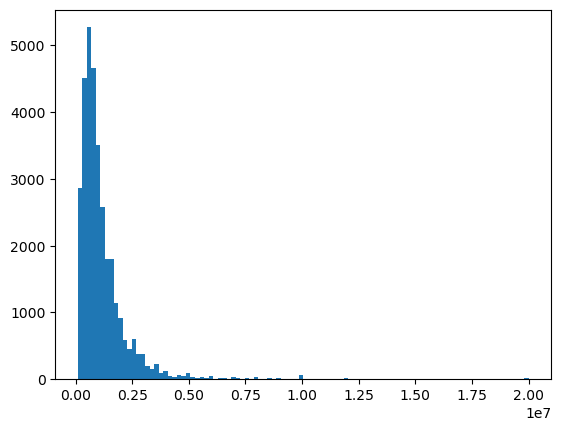

In [74]:
plt.hist(company_mean_salary, bins=100)
plt.show()

In [75]:
pd.DataFrame(company_mean_salary).describe()

,0
count,3.302900e+04
mean,1.185077e+06
std,1.309363e+06
min,1.000000e+05
25%,5.000000e+05
50%,8.411110e+05
75%,1.416667e+06
max,2.000000e+07


    - Based on the above stats, we can categorize company as Tier4, Tier3, Tier2, Tier 1 on the salary thresholds (Assuming Tier 1 companies pay highest salaries)
    - [0,500000, 850000, 145000, float('inf')]

In [76]:
bin_threshold = [0,500000, 850000, 1450000, float('inf')]
bin_labels = ['Tier4', 'Tier3', 'Tier2', 'Tier1']

# Use pd.cut to convert continuous variable into categories
new_df['Company_Tier'] = pd.cut(new_df['ctc'], bins=bin_threshold, labels=bin_labels)

In [77]:
# Get the range of number of employees in the companies
company_emp_count = new_df.groupby('company_hash', observed=True).agg({'ctc':['mean', 'count']}).reset_index()[('ctc','count')]

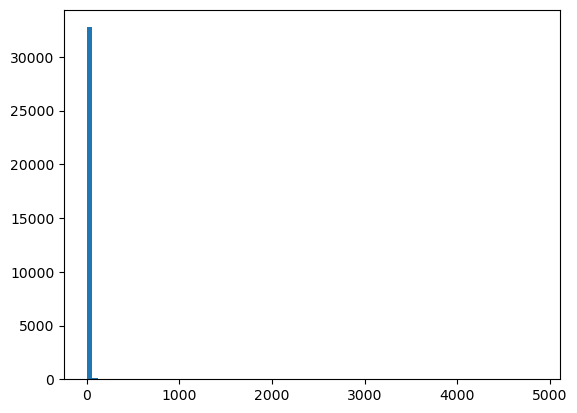

In [78]:
plt.hist(company_emp_count, bins=80)
plt.show()

In [79]:
sum(company_emp_count[company_emp_count==1])/len(company_emp_count)

0.7558509188894608

    - We have 75.5% of the companies with only single employee details. Hence, we won't be able to classify the company Tier based on the employee in the company

In [80]:
len(company_emp_count[company_emp_count>1])/len(company_emp_count)*100

24.414908111053922

#### Mean CTC Vs Years of Experience

In [81]:
# Aggregation based on Years of Experience and CTC
avg_ctc_yoe = new_df.groupby('Years of Experience', observed=True).agg({'ctc':'mean'}).reset_index()

In [82]:
avg_ctc_yoe.sort_values('ctc',ascending=False)

,Years of Experience,ctc
18,18,2.838567e+06
19,19,2.834210e+06
17,17,2.797783e+06
15,15,2.635548e+06
16,16,2.597261e+06
14,14,2.593973e+06
13,13,2.487436e+06
12,12,2.245482e+06
11,11,2.164716e+06
20,20,2.125136e+06


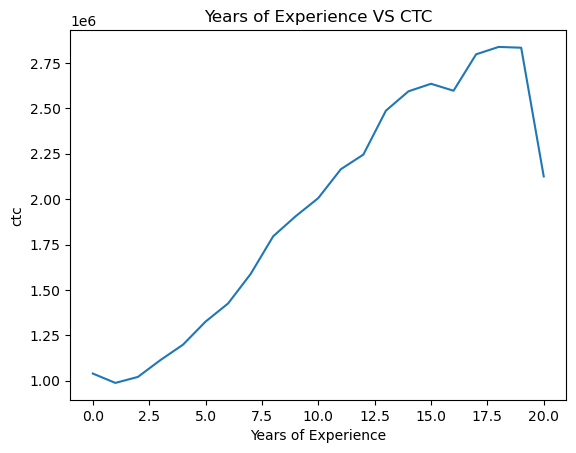

In [83]:
sns.lineplot(data = avg_ctc_yoe, x = 'Years of Experience', y = 'ctc')
plt.title("Years of Experience VS CTC")
plt.show()

    As the number of Years of Experience increases the CTC also increases from 0 to 19 years, but after that there is a drop at 20 years
    Maximum CTC is attained around at 18 Years of Experience

#### Aggregation based on job roles

In [84]:
# Aggregation based on Years of Experience and job role
avg_ctc_jp = new_df.groupby('job_position', observed=True).agg({'ctc':'mean'}).reset_index()

In [85]:
avg_ctc_jp.sort_values('ctc', ascending=False, inplace=True)

In [86]:
avg_ctc_jp.reset_index(inplace=True, drop=True)

In [87]:
# # Dropping index 108204 because Years of Experience is 0 and also 1cr is the ctc. Seems outlier
# new_df.drop(108204, axis=0,inplace=True)

In [88]:
new_df.shape

(139990, 10)

In [89]:
new_df.reset_index(inplace=True, drop=True)

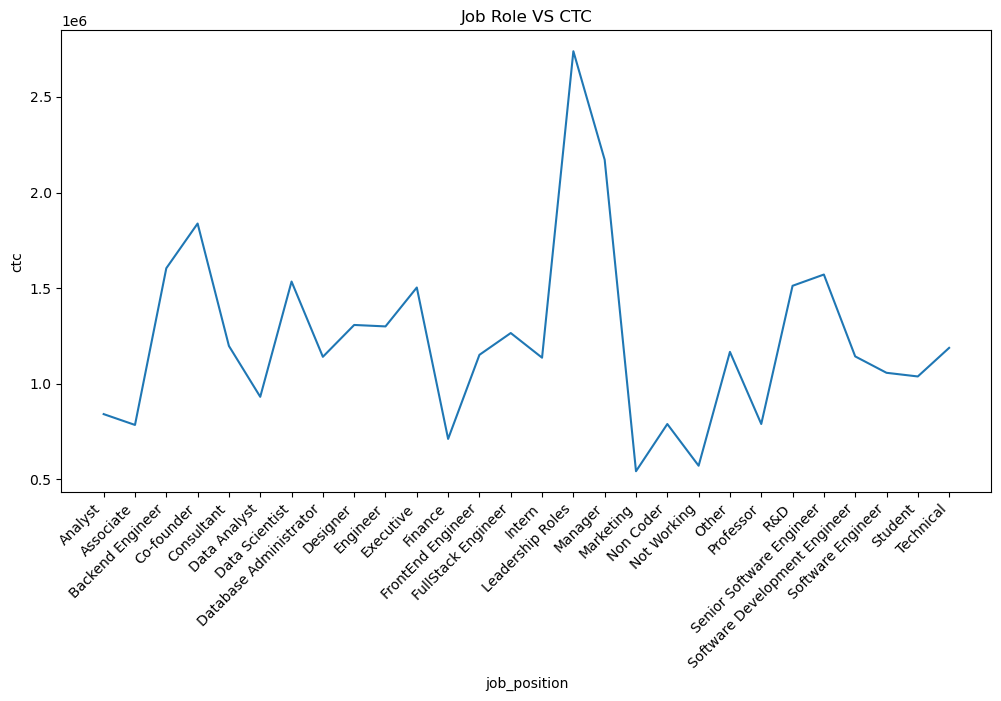

In [90]:
# Aggregation based on Years of Experience and job role
avg_ctc_jp = new_df.groupby('job_position', observed=True).agg({'ctc':'mean'}).reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data = avg_ctc_jp, x = 'job_position', y = 'ctc')
plt.title("Job Role VS CTC")
plt.xticks(rotation=45, ha='right')
plt.show()

    - Leadership roles are paid the highest salary
    - Mangers are then paid the second-highest salary
    - Third highest are the Co-founders
    - Rest Backend Engineer > Senior Software Engineer > Data Scientist > R&D > Executive > FullStack Engineer > FrontEnd Engineer > Software Development Engineer

In [91]:
avg_ctc_jp.sort_values('ctc', ascending=False)

,job_position,ctc
15,Leadership Roles,2.738656e+06
16,Manager,2.171034e+06
3,Co-founder,1.837966e+06
2,Backend Engineer,1.604239e+06
23,Senior Software Engineer,1.571334e+06
6,Data Scientist,1.534651e+06
22,R&D,1.512482e+06
10,Executive,1.503500e+06
8,Designer,1.307743e+06
9,Engineer,1.300167e+06


In [92]:
new_df[(new_df.job_position=='Student') & (new_df.ctc>6000000)].email_hash.values

['1ea2361b3a4e99d832c3004fd708fa87310ba6117408c...]
Categories (153333, object): ['00003288036a44374976948c327f246fdbdf077854690..., '0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf..., '0000d58fbc18012bf6fa2605a7b0357d126ee69bc4103..., '000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d..., ..., 'fffcf97db1e9c13898f4eb4cd1c2fe862358480e10453..., 'fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b0..., 'ffff49f963e4493d8bbc7cc15365423d84a767259f720..., 'ffffa3eb3575f43b86d986911463dce7bcadcea227e5a...]

In [93]:
df[df.email_hash.isin(new_df[(new_df.job_position=='Student') & (new_df.ctc>1500000)].email_hash.values)]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
6041,zgn vuurxwvmrt vwwghzn,f6a4fb08e6c9fa80f0f25511f0516bc118fa6aa7b5dba6...,2017,1850000,Student,2021
23965,zgn vuurxwvmrt vwwghzn,5e4e93dc7061d8e2b8c4acf9401e5e0c09924a5507a4f9...,2021,1600000,Student,2021
27847,zgn vuurxwvmrt vwwghzn,5e4e93dc7061d8e2b8c4acf9401e5e0c09924a5507a4f9...,2021,1600000,NaN,2021
59655,zgn vuurxwvmrt vwwghzn,f6a4fb08e6c9fa80f0f25511f0516bc118fa6aa7b5dba6...,2017,1850000,NaN,2021
60872,oxtbtzo,1ea2361b3a4e99d832c3004fd708fa87310ba6117408cb...,2016,8400000,PhD. Student,2019
161561,oxtbtzo,1ea2361b3a4e99d832c3004fd708fa87310ba6117408cb...,2016,8400000,NaN,2019


    - Marketing people are paid the least followed by not working and Finance people
    - Students are paid more than non-working because those are the stipend holder students (PhD)

In [94]:
new_df[(new_df.job_position=='Other')&(new_df.CTC_Label=='Very High')].sort_values('ctc', ascending=False)

,email_hash,job_position,ctc_updated_year,company_hash,orgyear,ctc,Years of Experience,CTC_Label,CTC_Increased,Company_Tier
41331,4beee431866cc493f7cc6689c2f00023683575a29e3174...,Other,2020,xmb xzaxv uqxcvnt rxbxnta,2013,20000000,7,Very High,0,Tier1
55968,665a94c8a8ac25a31171e75e2cdccb02e14e011cfb9b02...,Other,2020,twgbbtqwt onvqnhu,2015,20000000,5,Very High,0,Tier1
66487,79df3c040592f8d30dd71c3bdecba3d2eb9241df6cfdc7...,Other,2020,jhnx atoxsztq yghot,2018,20000000,2,Very High,0,Tier1
17631,1ff31555fc121de1557618b5acacbfb8b6ee05779e4c49...,Other,2020,ngjgnv bgngq wgqugqvnxgz,2019,20000000,1,Very High,0,Tier1
117989,d7ba796937561b4aeba72e17f2600c2d936c31c84b694b...,Other,2020,srgmvr tahwvnxgzvr otqcxwto,2016,20000000,4,Very High,0,Tier1
...,...,...,...,...,...,...,...,...,...,...
423,00cd246588f4613a551108ac5a116a9cacf5780a3f9a3e...,Other,2019,fvrbvqn rvmo,2012,2520000,7,Very High,0,Tier1
55189,64ece11d8660f9818ca1c547f25ab2d07275f250bce6d0...,Other,2020,gqvwrt xaw,2012,2520000,8,Very High,0,Tier1
71373,82bde4535bae8c03ab3c73de7290e15ae28f86cf73b97f...,Other,2018,tuoxrgz ntwyzgrgsxto,2008,2510000,10,Very High,0,Tier1
2433,047fcaafae35803bb92f81eff5800b644ca2f36a96f516...,Other,2019,hzxntaytvrny sqghu,2018,2510000,1,Very High,0,Tier1


### Ordinal Encoding CTC_Label 

In [95]:
encoding = {'Very High':3.0, 'High':2.0, 'Medium':1.0, 'Low':0.0}

# Transform the dataset
new_df['ctc_encoded'] = new_df.CTC_Label.replace(encoding)
new_df

,email_hash,job_position,ctc_updated_year,company_hash,orgyear,ctc,Years of Experience,CTC_Label,CTC_Increased,Company_Tier,ctc_encoded
0,00003288036a44374976948c327f246fdbdf0778546904...,Backend Engineer,2019,bxwqgogen,2012,3500000,7,Very High,0,Tier1,3.0
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,Backend Engineer,2020,nqsn axsxnvr,2013,250000,7,Low,0,Tier4,0.0
2,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,FullStack Engineer,2021,bxwqgotbx wgqugqvnxgz,2004,2000000,17,High,0,Tier1,2.0
3,00014d71a389170e668ba96ae8e1f9d991591acc899025...,Other,2018,fvrbvqn rvmo,2009,3400000,9,Very High,0,Tier1,3.0
4,0001b94dbb1e85477b07fb6558ead3456c3735893c81f4...,Database Administrator,2020,nvnv wgzohrnvzwj otqcxwto,2018,380000,2,Low,0,Tier4,0.0
...,...,...,...,...,...,...,...,...,...,...,...
139985,fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...,Software Engineer,2019,tqxwoogz ogenfvqt wvbuho,2004,3529999,15,Very High,0,Tier1,3.0
139986,fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...,Other,2018,trnqvcg,2015,1600000,3,High,0,Tier1,2.0
139987,fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...,Software Engineer,2019,znn avnv srgmvr atrxctqj otqcxwto,2014,900000,5,Medium,0,Tier2,1.0
139988,ffff49f963e4493d8bbc7cc15365423d84a767259f7200...,FullStack Engineer,2020,zwq wgqugqvnxgz,2020,700000,0,Medium,0,Tier3,1.0


In [96]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139990 entries, 0 to 139989
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   email_hash           139990 non-null  category
 1   job_position         139990 non-null  category
 2   ctc_updated_year     139990 non-null  Int64   
 3   company_hash         139990 non-null  category
 4   orgyear              139990 non-null  Int64   
 5   ctc                  139990 non-null  int64   
 6   Years of Experience  139990 non-null  Int64   
 7   CTC_Label            139990 non-null  category
 8   CTC_Increased        139990 non-null  int64   
 9   Company_Tier         139990 non-null  category
 10  ctc_encoded          139990 non-null  category
dtypes: Int64(3), category(6), int64(2)
memory usage: 13.8 MB


In [97]:
# Company Encoding
encoding = {'Tier1':3.0, 'Tier2':2.0, 'Tier3':1.0, 'Tier4':0.0}

# Transform the dataset
new_df['company_encoded'] = new_df.Company_Tier.replace(encoding)
new_df

,email_hash,job_position,ctc_updated_year,company_hash,orgyear,ctc,Years of Experience,CTC_Label,CTC_Increased,Company_Tier,ctc_encoded,company_encoded
0,00003288036a44374976948c327f246fdbdf0778546904...,Backend Engineer,2019,bxwqgogen,2012,3500000,7,Very High,0,Tier1,3.0,3.0
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,Backend Engineer,2020,nqsn axsxnvr,2013,250000,7,Low,0,Tier4,0.0,0.0
2,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,FullStack Engineer,2021,bxwqgotbx wgqugqvnxgz,2004,2000000,17,High,0,Tier1,2.0,3.0
3,00014d71a389170e668ba96ae8e1f9d991591acc899025...,Other,2018,fvrbvqn rvmo,2009,3400000,9,Very High,0,Tier1,3.0,3.0
4,0001b94dbb1e85477b07fb6558ead3456c3735893c81f4...,Database Administrator,2020,nvnv wgzohrnvzwj otqcxwto,2018,380000,2,Low,0,Tier4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
139985,fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...,Software Engineer,2019,tqxwoogz ogenfvqt wvbuho,2004,3529999,15,Very High,0,Tier1,3.0,3.0
139986,fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...,Other,2018,trnqvcg,2015,1600000,3,High,0,Tier1,2.0,3.0
139987,fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...,Software Engineer,2019,znn avnv srgmvr atrxctqj otqcxwto,2014,900000,5,Medium,0,Tier2,1.0,2.0
139988,ffff49f963e4493d8bbc7cc15365423d84a767259f7200...,FullStack Engineer,2020,zwq wgqugqvnxgz,2020,700000,0,Medium,0,Tier3,1.0,1.0


In [98]:
# Changing the category type of company_encoded and ctc_encoded to int64 type
new_df.company_encoded = new_df.company_encoded.astype('int64')
new_df.ctc_encoded = new_df.ctc_encoded.astype('int64')

In [99]:
new_df.select_dtypes(np.number).corr()

,ctc_updated_year,orgyear,ctc,Years of Experience,CTC_Increased,ctc_encoded,company_encoded
ctc_updated_year,1.000000,0.311617,-0.087914,0.016421,0.137080,-0.137034,-0.137554
orgyear,0.311617,1.000000,-0.317898,-0.944963,0.077232,-0.396883,-0.378998
ctc,-0.087914,-0.317898,1.000000,0.304241,0.051416,0.769770,0.651883
Years of Experience,0.016421,-0.944963,0.304241,1.000000,-0.034068,0.370440,0.351441
CTC_Increased,0.137080,0.077232,0.051416,-0.034068,1.000000,0.064990,0.071804
ctc_encoded,-0.137034,-0.396883,0.769770,0.370440,0.064990,1.000000,0.900221
company_encoded,-0.137554,-0.378998,0.651883,0.351441,0.071804,0.900221,1.000000


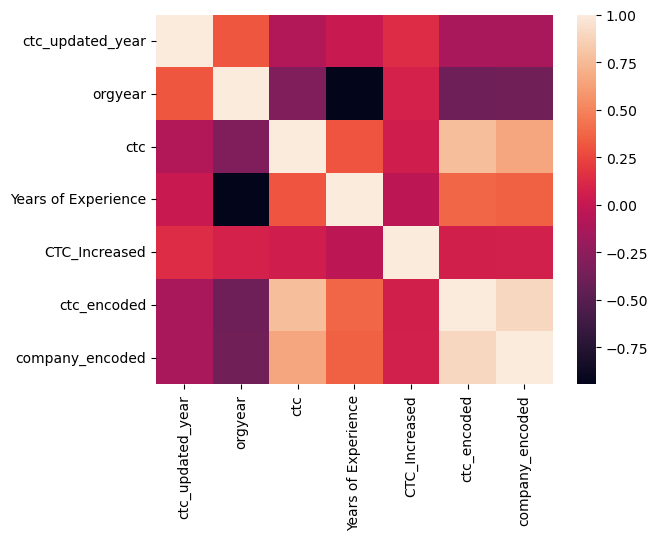

In [100]:
sns.heatmap(new_df.select_dtypes(np.number).corr())
plt.show()

    ctc_encoded and company_encoded are highly positively correlated 
    orgyear and YEars or Experience is highly negalively correlated

In [101]:
# # Dropping the CTC_Label, Company_Tier column
# new_df.drop(['CTC_Label', 'Company_Tier'], axis=1, inplace=True)

In [102]:
new_df_num = new_df.select_dtypes(np.number)

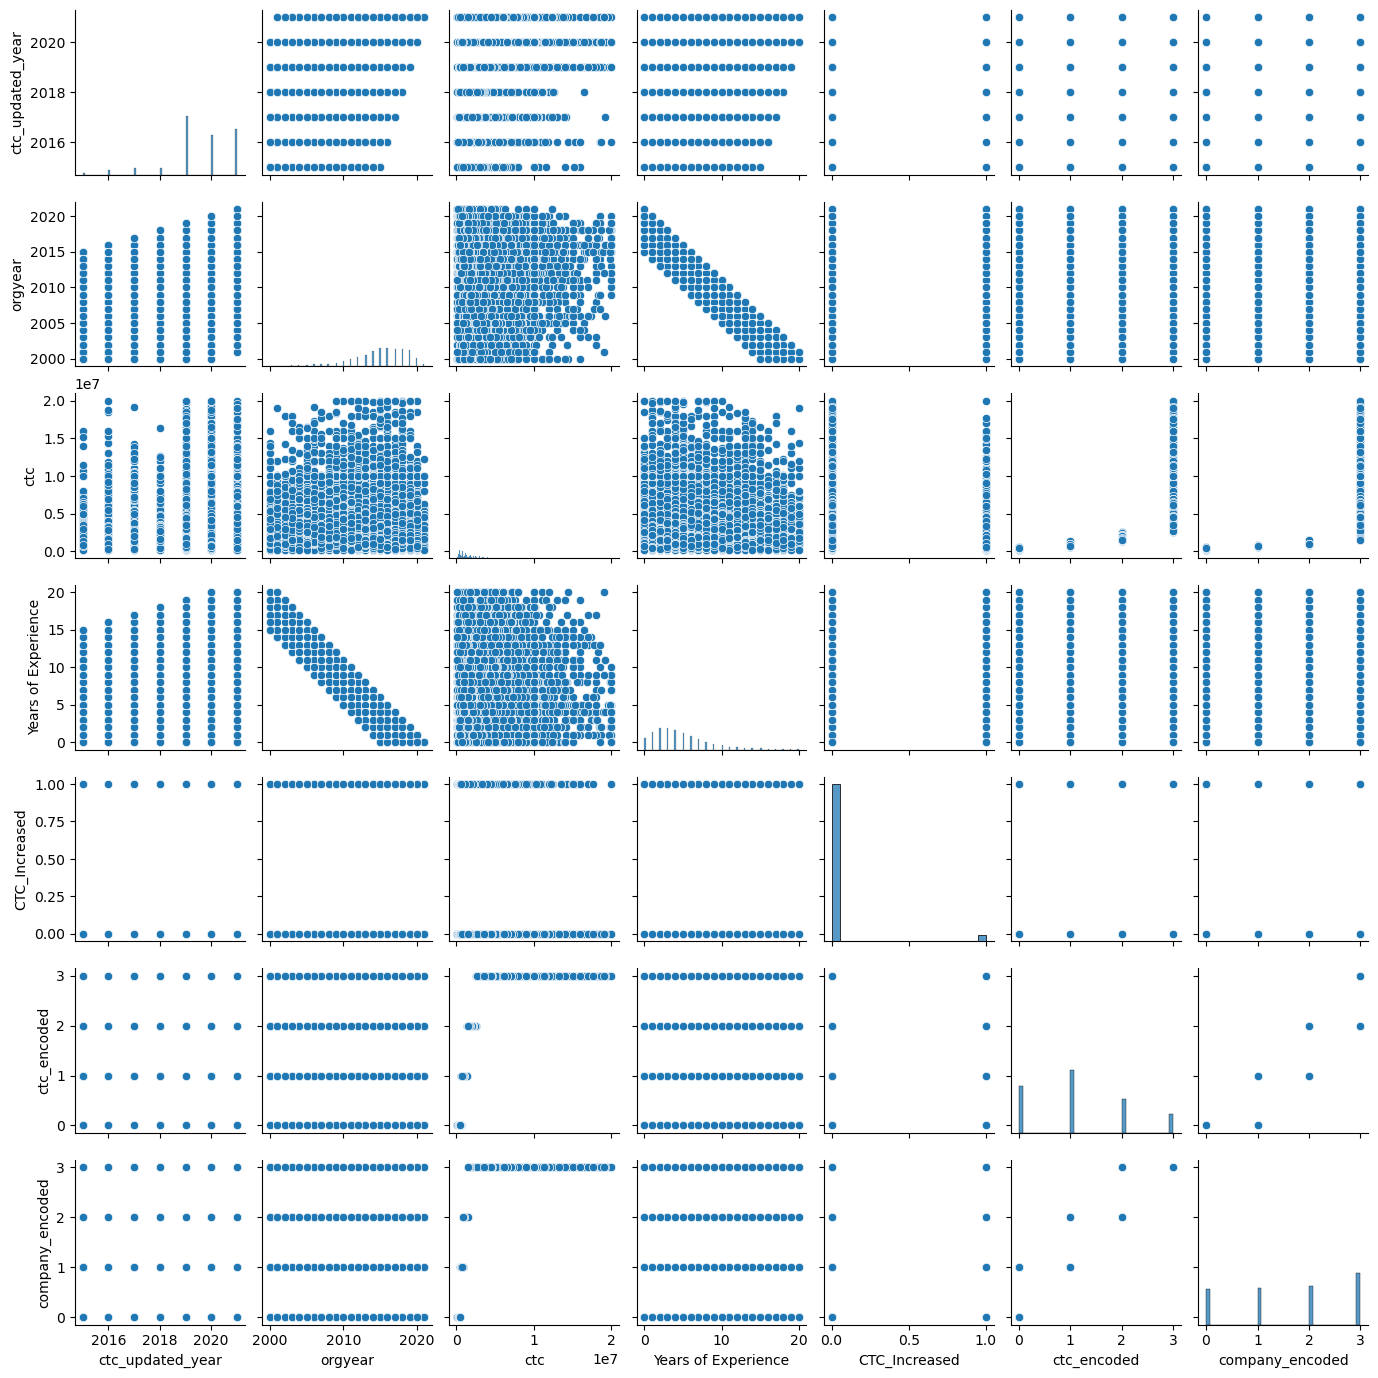

<Figure size 1400x1400 with 0 Axes>

In [103]:
# Plot numerical values pairplot
# sns.pairplot(new_df_num)
# plt.show()

sns_plot = sns.pairplot(new_df_num, size=2.0)
sns_plot.savefig("pairplot.png")

plt.clf() # Clean parirplot figure from sns 
Image(filename='pairplot.png') # Show pairplot as image

    - There is inverse relationship between Years of experience and orgyear. As higher Years of experience denotes, the person joined the organisation earlier
    - CTC has increased over the Years. (ctc_updated_year vs Years of Experience)

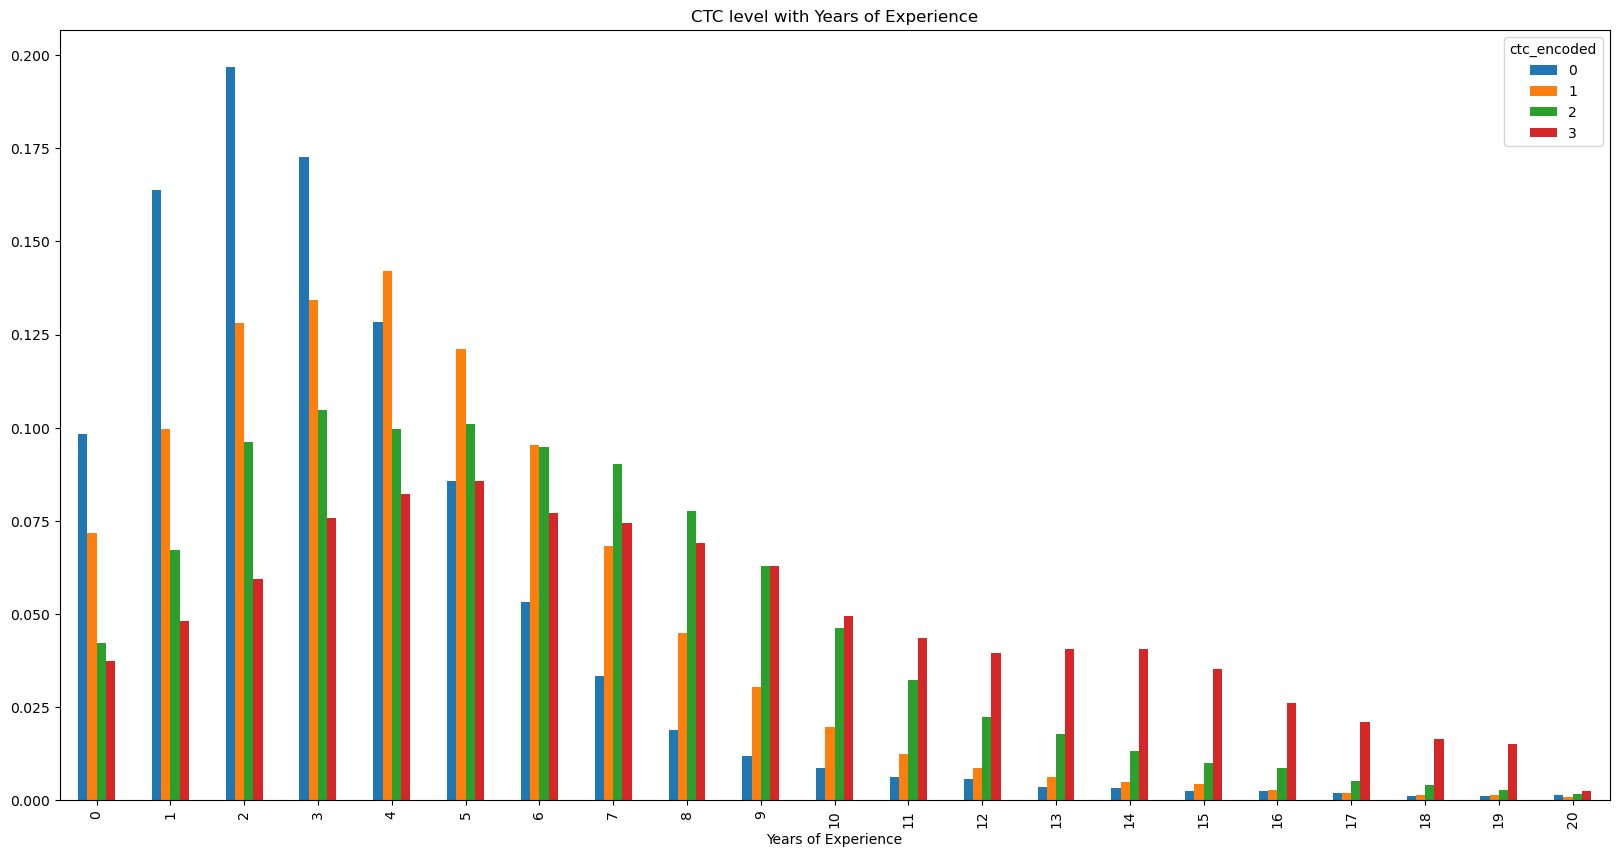

In [104]:
# CTC_LEvels vs Years of experiences
cYoE= pd.crosstab(new_df['Years of Experience'],new_df['ctc_encoded'])
cYoE.div(cYoE.sum(0).astype(float)).plot(kind='bar',stacked=False,title="CTC level with Years of Experience", figsize = (20,10))
plt.show()

    - For initial 3 years of experience, maximum people are paid low CTC, followed by Medium, High and Very High; i.e. With Initial 3 years not many people receive very high CTC
    - From 4th year of experience onwards the CTC trend changes and people start seeing hikes in their CTC
    - As experience becomes more than 9 years, Very high CTC are offered to people.

### One hot encode the job_position

In [105]:
new_df = pd.concat([new_df,pd.get_dummies(new_df['job_position'],prefix='Job', dtype=float)],axis=1)

In [106]:
# new_df.drop(['job_position'], axis=1, inplace=True)

In [107]:
new_df.head()

,email_hash,job_position,ctc_updated_year,company_hash,orgyear,ctc,Years of Experience,CTC_Label,CTC_Increased,Company_Tier,...,Job_Non Coder,Job_Not Working,Job_Other,Job_Professor,Job_R&D,Job_Senior Software Engineer,Job_Software Development Engineer,Job_Software Engineer,Job_Student,Job_Technical
0,00003288036a44374976948c327f246fdbdf0778546904...,Backend Engineer,2019,bxwqgogen,2012,3500000,7,Very High,0,Tier1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,Backend Engineer,2020,nqsn axsxnvr,2013,250000,7,Low,0,Tier4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,FullStack Engineer,2021,bxwqgotbx wgqugqvnxgz,2004,2000000,17,High,0,Tier1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00014d71a389170e668ba96ae8e1f9d991591acc899025...,Other,2018,fvrbvqn rvmo,2009,3400000,9,Very High,0,Tier1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0001b94dbb1e85477b07fb6558ead3456c3735893c81f4...,Database Administrator,2020,nvnv wgzohrnvzwj otqcxwto,2018,380000,2,Low,0,Tier4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139990 entries, 0 to 139989
Data columns (total 40 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   email_hash                         139990 non-null  category
 1   job_position                       139990 non-null  category
 2   ctc_updated_year                   139990 non-null  Int64   
 3   company_hash                       139990 non-null  category
 4   orgyear                            139990 non-null  Int64   
 5   ctc                                139990 non-null  int64   
 6   Years of Experience                139990 non-null  Int64   
 7   CTC_Label                          139990 non-null  category
 8   CTC_Increased                      139990 non-null  int64   
 9   Company_Tier                       139990 non-null  category
 10  ctc_encoded                        139990 non-null  int64   
 11  company_encoded           

In [109]:
new_df.describe(include='all')

,email_hash,job_position,ctc_updated_year,company_hash,orgyear,ctc,Years of Experience,CTC_Label,CTC_Increased,Company_Tier,...,Job_Non Coder,Job_Not Working,Job_Other,Job_Professor,Job_R&D,Job_Senior Software Engineer,Job_Software Development Engineer,Job_Software Engineer,Job_Student,Job_Technical
count,139990,139990,139990.0,139990,139990.0,1.399900e+05,139990.0,139990,139990.000000,139990,...,139990.000000,139990.000000,139990.000000,139990.000000,139990.000000,139990.000000,139990.000000,139990.00000,139990.000000,139990.000000
unique,139990,28,<NA>,33029,<NA>,NaN,<NA>,4,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,00003288036a44374976948c327f246fdbdf0778546904...,Backend Engineer,<NA>,nvnv wgzohrnvzwj otqcxwto,<NA>,NaN,<NA>,Medium,NaN,Tier1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,36021,<NA>,4866,<NA>,NaN,<NA>,54305,NaN,44355,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2019.559969,NaN,2014.773441,1.363728e+06,4.786528,NaN,0.035924,NaN,...,0.003936,0.000150,0.220373,0.000236,0.006158,0.001350,0.065983,0.11353,0.000136,0.000464
std,NaN,NaN,1.287767,NaN,3.935455,1.381849e+06,3.740004,NaN,0.186101,NaN,...,0.062614,0.012247,0.414500,0.015352,0.078229,0.036719,0.248254,0.31724,0.011649,0.021543
min,NaN,NaN,2015.0,NaN,2000.0,1.000000e+05,0.0,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,NaN,NaN,2019.0,NaN,2013.0,6.000000e+05,2.0,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,NaN,NaN,2020.0,NaN,2015.0,1.000000e+06,4.0,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,NaN,NaN,2021.0,NaN,2018.0,1.700000e+06,7.0,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


## Dropping the categorical and encoded columns

### Scaling the data

    Normalising the Dataset. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

In [110]:
# Transforming the ctc using log trabsform, to handle the extremely high values
from math import log
new_df['ctc_log'] = new_df['ctc'].apply(lambda x: log(x)).max()

In [111]:
#Feature Variables
X = new_df.drop(['email_hash','company_hash','job_position','CTC_Label', 'Company_Tier', 'ctc'],axis=1)
X_cols=X.columns
# MinMaxScaler
scaler = MinMaxScaler()

#Mathematically learning the distribution
X=scaler.fit_transform(X)

In [112]:
X_cols

Index(['ctc_updated_year', 'orgyear', 'Years of Experience', 'CTC_Increased',
       'ctc_encoded', 'company_encoded', 'Job_Analyst', 'Job_Associate',
       'Job_Backend Engineer', 'Job_Co-founder', 'Job_Consultant',
       'Job_Data Analyst', 'Job_Data Scientist', 'Job_Database Administrator',
       'Job_Designer', 'Job_Engineer', 'Job_Executive', 'Job_Finance',
       'Job_FrontEnd Engineer', 'Job_FullStack Engineer', 'Job_Intern',
       'Job_Leadership Roles', 'Job_Manager', 'Job_Marketing', 'Job_Non Coder',
       'Job_Not Working', 'Job_Other', 'Job_Professor', 'Job_R&D',
       'Job_Senior Software Engineer', 'Job_Software Development Engineer',
       'Job_Software Engineer', 'Job_Student', 'Job_Technical', 'ctc_log'],
      dtype='object')

In [113]:
X.shape

(139990, 35)

In [114]:
X = pd.DataFrame(X, columns=X_cols)

In [115]:
X.head()

,ctc_updated_year,orgyear,Years of Experience,CTC_Increased,ctc_encoded,company_encoded,Job_Analyst,Job_Associate,Job_Backend Engineer,Job_Co-founder,...,Job_Not Working,Job_Other,Job_Professor,Job_R&D,Job_Senior Software Engineer,Job_Software Development Engineer,Job_Software Engineer,Job_Student,Job_Technical,ctc_log
0,0.666667,0.571429,0.35,0.0,1.000000,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.833333,0.619048,0.35,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.190476,0.85,0.0,0.666667,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.500000,0.428571,0.45,0.0,1.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.833333,0.857143,0.10,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Building

In [116]:
# Splitting the data for later checking of clustering robustness
# In 80:20 ratio
X_train, X_test = train_test_split(X, train_size=0.8, random_state=6)

In [117]:
X_train.shape, X_test.shape

((111992, 35), (27998, 35))

### Hopkins Statistics for checking if data has natural tendency to form cluster or not

In [118]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
def hopkins(X):
    n = X.shape[0] # rows
    d = X.shape[1] #columns
  
    m = int(0.1 * n) #size of randomly sampled data
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
     
    rand_X = sample(range(0, n, 1), m)
     
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
     
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [119]:
hopkins(X_train)

0.9992652977727268

    Since, H is almost near 0.99, it has high cluster tendency

## Optimal number of cluster using the elbow method

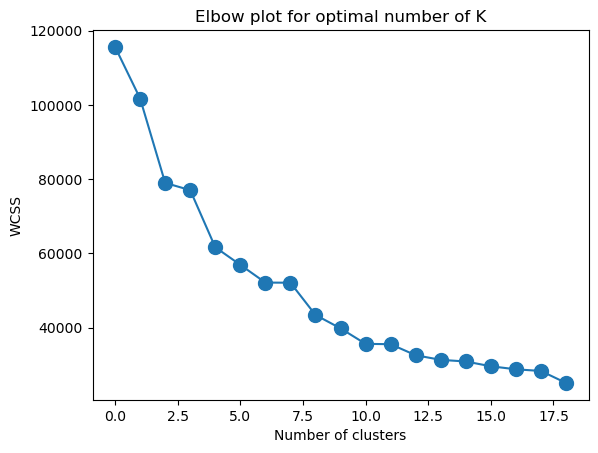

In [120]:
# Quick examination of elbow method to find numbers of clusters to make.
k_vals = list(range(2, 21))
WCSSE = []
for k in k_vals:
    kmeans = KMeans(n_clusters=k, n_init='auto')
    model = kmeans.fit(X_train)
    WCSSE.append(model.inertia_)
plt.plot(WCSSE, marker='o', markersize=10)
plt.xlabel('Number of clusters') 
plt.ylabel('WCSS')
plt.title("Elbow plot for optimal number of K")
plt.show()

    6 is the optimal number of K, according to the elbow plot

## KMeans Clustering

In [121]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=6, n_init=10)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)

In [122]:
clusters = pd.DataFrame(X_test, columns=X_test.columns)
clusters['label'] = y_pred
clusters

,ctc_updated_year,orgyear,Years of Experience,CTC_Increased,ctc_encoded,company_encoded,Job_Analyst,Job_Associate,Job_Backend Engineer,Job_Co-founder,...,Job_Other,Job_Professor,Job_R&D,Job_Senior Software Engineer,Job_Software Development Engineer,Job_Software Engineer,Job_Student,Job_Technical,ctc_log,label
13301,0.666667,0.238095,0.70,0.0,1.000000,1.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
82610,1.000000,0.952381,0.05,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
120726,0.833333,0.761905,0.20,0.0,0.333333,0.666667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
61954,0.833333,0.714286,0.25,0.0,0.333333,0.666667,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
24673,0.666667,0.333333,0.60,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92353,0.666667,0.714286,0.20,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
66689,0.666667,0.857143,0.05,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
85290,0.833333,0.428571,0.55,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
10880,0.500000,0.666667,0.20,0.0,0.333333,0.666667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


<Axes: >

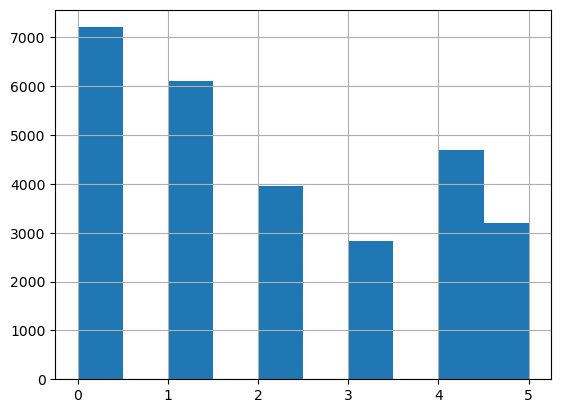

In [123]:
# Distributon of the clusters
clusters['label'].hist()

## Agglomerative clustering

In [125]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
train_subset = X_train.sample(frac=0.1)

# Refer https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
Z = sch.linkage(train_subset, method='ward') #linkage = ward

In [126]:
Z.shape

(11198, 4)

Text(0, 0.5, 'distance')

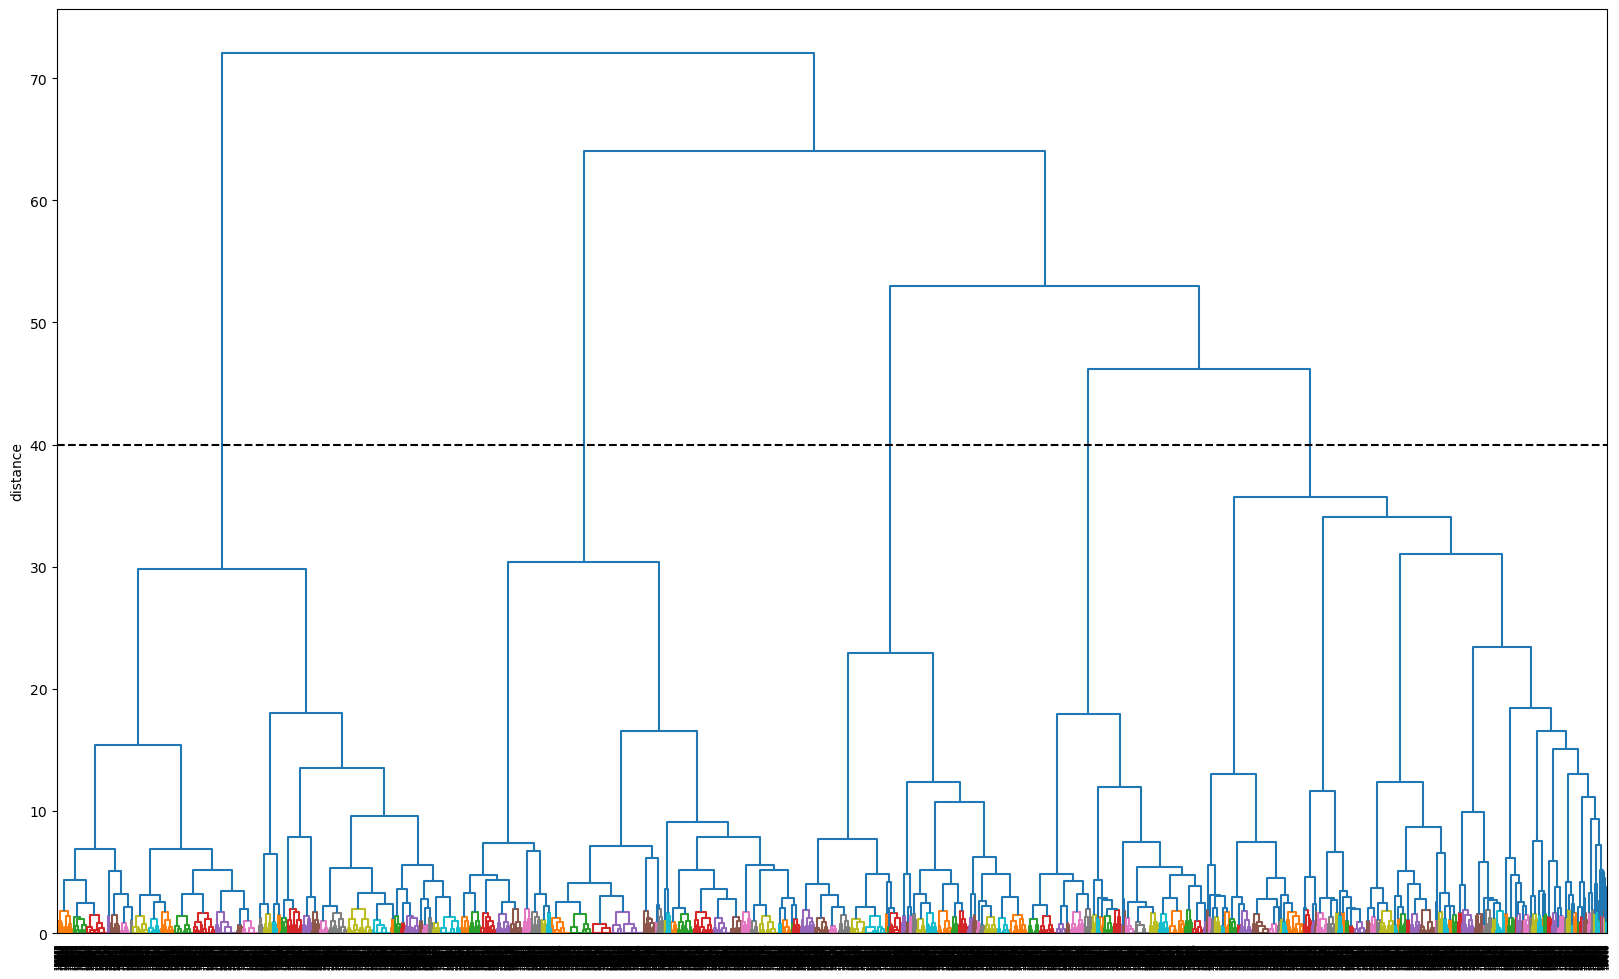

In [148]:
fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=train_subset.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
plt.axhline(y=40, color='k', linestyle='--')
ax.set_ylabel('distance')

    - According to the dendogram diagram, there can be 5 clusters present.

In [130]:
# import hierarchical clustering libraries
from sklearn.cluster import AgglomerativeClustering


# create clusters
hc_clusters = AgglomerativeClustering(n_clusters=5, metric = 'euclidean', linkage = 'ward')

hc_X = X_train.sample(frac=0.2)
y_pred = hc_clusters.fit_predict(hc_X)

array([[<Axes: title={'center': '0'}>]], dtype=object)

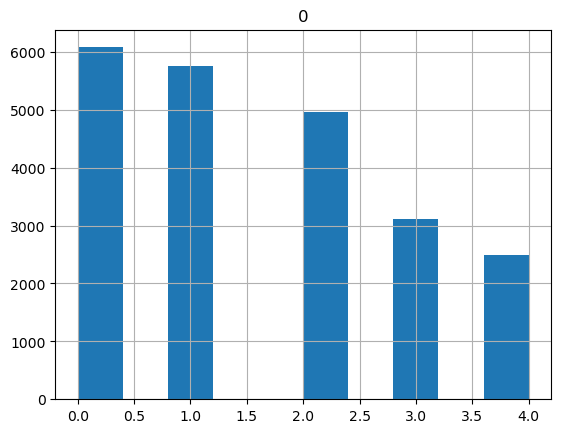

In [131]:
pd.DataFrame(y_pred).hist()

In [138]:
y_pred.shape

(22398,)

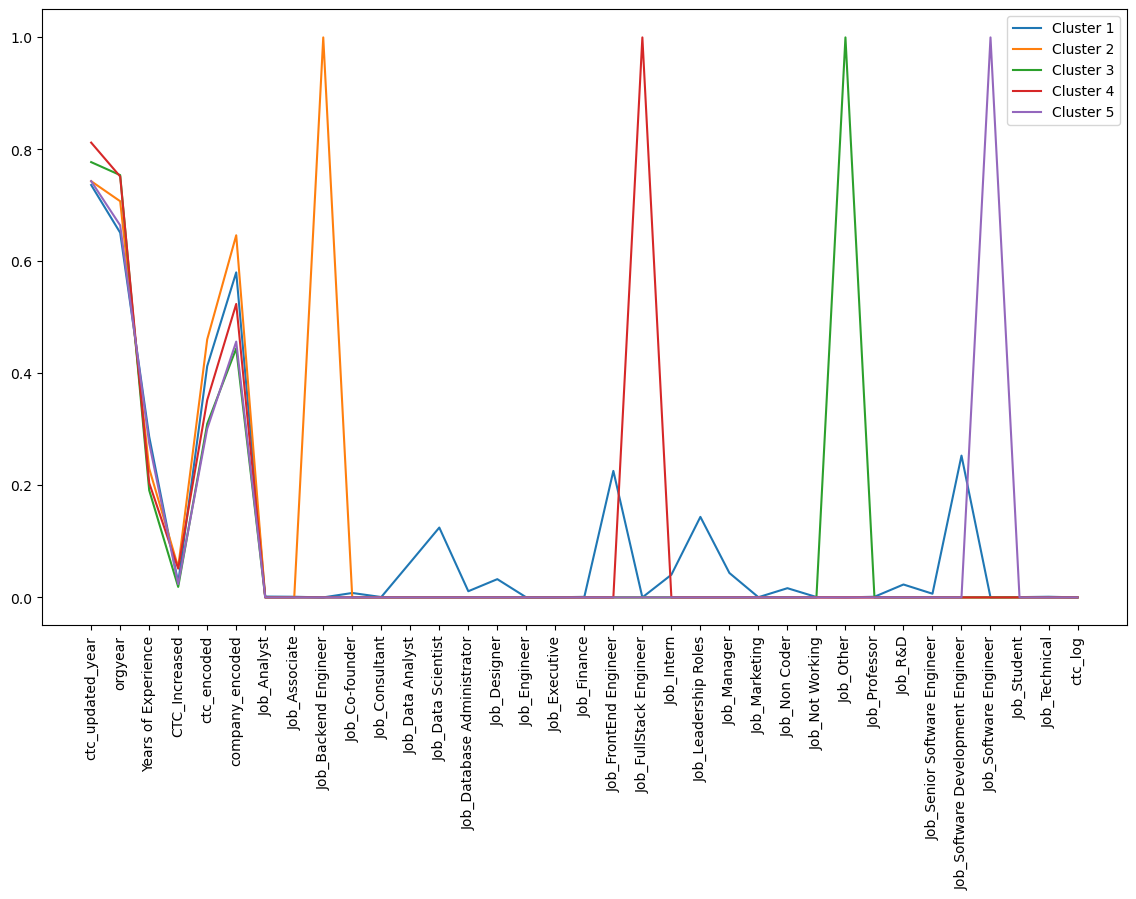

In [132]:
#Plot a line graph to see the characteristics of the clusters
hc_X['label'] = pd.Series(y_pred, index=hc_X.index)

clustered_df = hc_X.groupby('label').mean()

labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

plt.figure(figsize=(14,8))
plt.plot(clustered_df.T, label=labels)
plt.xticks(rotation=90)
plt.legend(labels)

#### -From the Hierarchical clustering different roles or different levels within the company are not clear. As for the Associate and the Co-founder they are clubbed in single cluster.

#### The years of Experience feature was not a strong indicator of the clusters. 

In [133]:
km = KMeans(n_clusters=5, init = 'k-means++', random_state = 50, n_init=10)
y_km = km.fit_predict(X_train)

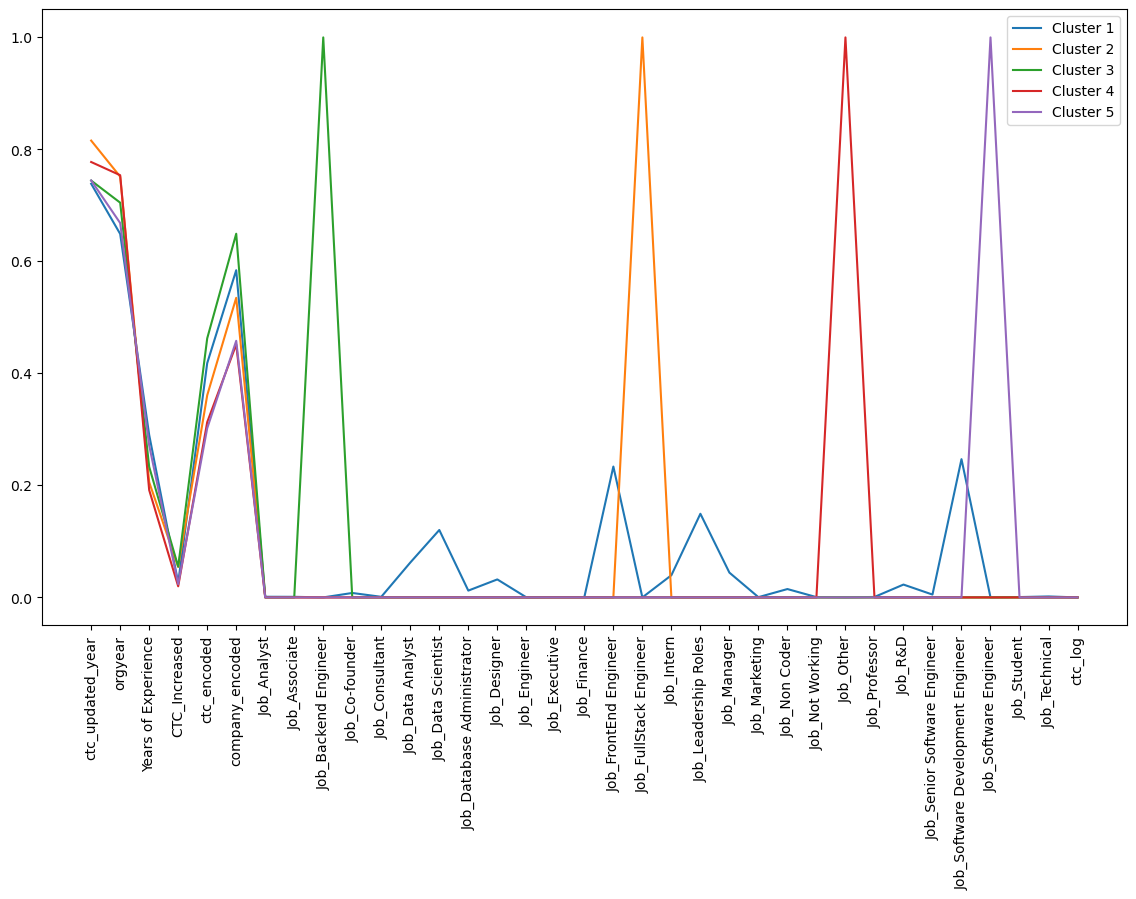

In [134]:
X_train['km_label'] = pd.Series(y_km, index=X_train.index)

clustered_df_km = X_train.groupby('km_label').mean()

labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

plt.figure(figsize=(14,8))
plt.plot(clustered_df_km.T, label=labels)
plt.xticks(rotation=90)
plt.legend(labels)

#### Q1. User in the largest cluster

array([[<Axes: title={'center': '0'}>]], dtype=object)

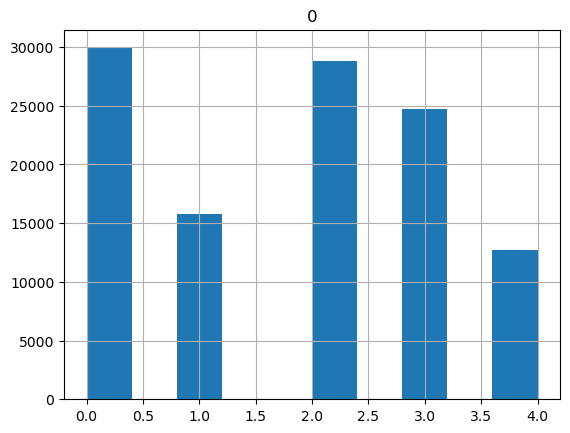

In [139]:
pd.DataFrame(y_km).hist()

In [140]:
cluster_df = pd.DataFrame(y_km, columns=['C_Labels'])

In [147]:
cluster_df.value_counts()/cluster_df.shape[0]

C_Labels
0           0.267724
2           0.257268
3           0.220623
1           0.141055
4           0.113330
Name: count, dtype: float64

    26.8% of the learners fall in the largest cluster

#### Q. Unusual High CTCs for Intern Job position

In [137]:
new_df[(new_df.job_position=='Intern') & (new_df.CTC_Label=='Very High')].sort_values('ctc', ascending=False)

,email_hash,job_position,ctc_updated_year,company_hash,orgyear,ctc,Years of Experience,CTC_Label,CTC_Increased,Company_Tier,...,Job_Not Working,Job_Other,Job_Professor,Job_R&D,Job_Senior Software Engineer,Job_Software Development Engineer,Job_Software Engineer,Job_Student,Job_Technical,ctc_log
27094,317dd00cd99c43f133ff80197d7c19ec6b82a28855a530...,Intern,2020,gnytq,2017,20000000,3,Very High,0,Tier1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.811243
99816,b670eb1fe3f288e2810117403f1566f6daa3f0939c8c26...,Intern,2019,qgmgoyvonqv,2018,19700000,1,Very High,0,Tier1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.811243
19225,22e09caa502a1284164f2948bfc240aea249c085b93714...,Intern,2019,cxov,2018,14100000,1,Very High,0,Tier1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.811243
73500,8688323064dd7258b4934dc9f5f72501d1e613486f64cf...,Intern,2020,lubgqsvz wyvot wg,2020,12000000,0,Very High,0,Tier1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.811243
79522,9175c643862e0a844a23122680850e2d798372782d0604...,Intern,2020,bvwjo ntwy,2020,11500000,0,Very High,0,Tier1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.811243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100651,b7f160287bbef44c9fb8a2e4886ba58680a63dcc8b461c...,Intern,2019,xmb,2019,2550000,0,Very High,0,Tier1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.811243
55948,664d6cbc775d17ff5cb1d0940cd0a6ad24f7f7cbbc5bb5...,Intern,2020,bvtqop,2014,2520000,6,Very High,0,Tier1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.811243
85348,9c112a0fd55d47b3e70c89ed768d399b2eecd5c52a4fab...,Intern,2019,xznhxn,2019,2516000,0,Very High,0,Tier1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.811243
131512,f077b26e384fc9c053434995a5c15db41f56234a8b84fe...,Intern,2020,ytqt ntwyzgrgsxto,2016,2510000,4,Very High,0,Tier1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.811243


## Notes

    - Cluster 1: Associate, Backend Engineer and Founders from Tier1 companies and their CTCs were increased
    - Cluster 2: Frontend, FullStack and Interns with medium tier companies and their CTCs vere recently updated
    - CLuster 3: Not working, Other or Teaching/Instructor were another cluster
    - Cluster 4: Software Development Engineer, Software Engineer or Students, their years of experience is higher but ctc doesn't get updated much often
    - Cluster 5: Steady job_position in Tier 2 Companies in Consultant, Data Scientist, Data Analyst, LEadership, Manager, Senior software engg. They have higher job positions

In [153]:
new_df.groupby('Company_Tier', observed=True)['job_position'].agg(pd.Series.mode)

Company_Tier
Tier4               Other
Tier3               Other
Tier2    Backend Engineer
Tier1    Backend Engineer
Name: job_position, dtype: object

- Tier1 and Tier2 has max job_position as Backend Engineer, Whereas for Tier 3 and 4 Others is the dominant job role

In [155]:
new_df.groupby('Company_Tier', observed=True)['ctc'].mean()

Company_Tier
Tier4    3.557047e+05
Tier3    6.896738e+05
Tier2    1.124868e+06
Tier1    2.724363e+06
Name: ctc, dtype: float64

- Tier1 has the highest CTC forllowed by Tier2, Tier3 and Tier4

In [156]:
new_df.groupby('Company_Tier', observed=True)['Years of Experience'].mean()

Company_Tier
Tier4    3.211335
Tier3    3.751912
Tier2    4.827176
Tier1    6.590215
Name: Years of Experience, dtype: Float64

- Tier1 has the highest Years of Experience forllowed by Tier2, Tier3 and Tier4

In [159]:
new_df.groupby('Company_Tier', observed=True)['CTC_Increased'].mean()

Company_Tier
Tier4    0.015521
Tier3    0.029581
Tier2    0.040625
Tier1    0.051133
Name: CTC_Increased, dtype: float64

- Tier1 has the highest chance of getting raise in CTC forllowed by Tier2, Tier3 and Tier4